## Importing Libraries 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

## Data Importation and Filtering

In [7]:
# Loading data
Odey = pd.read_csv("weather_data.csv", parse_dates=["Date_Time"])

# Preparing data for Prophet
Odey_1 = Odey.rename(columns={"Date_Time": "ds", "Temperature_C": "y"})

# Resampling over daily average
Odey_1 = Odey_1.set_index("ds").resample("D").mean().reset_index()

Odey_1 = Odey_1[["ds", "y"]].dropna()

## Accessing the two DataFrames

In [8]:
print(Odey.head())
print(Odey.info())

       Location           Date_Time  Temperature_C  Humidity_pct  \
0     San Diego 2024-01-14 21:12:46      10.683001     41.195754   
1     San Diego 2024-05-17 15:22:10       8.734140     58.319107   
2     San Diego 2024-05-11 09:30:59      11.632436     38.820175   
3  Philadelphia 2024-02-26 17:32:39      -8.628976     54.074474   
4   San Antonio 2024-04-29 13:23:51      39.808213     72.899908   

   Precipitation_mm  Wind_Speed_kmh  
0          4.020119        8.233540  
1          9.111623       27.715161  
2          4.607511       28.732951  
3          3.183720       26.367303  
4          9.598282       29.898622  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Location          1000000 non-null  object        
 1   Date_Time         1000000 non-null  datetime64[ns]
 2   Temperature_C     10000

In [9]:
print(Odey_1.head())
print(Odey_1.info())

          ds          y
0 2024-01-01  14.434501
1 2024-01-02  14.055581
2 2024-01-03  14.516489
3 2024-01-04  14.577469
4 2024-01-05  14.622693
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      139 non-null    datetime64[ns]
 1   y       139 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.3 KB
None


## Prophet Modeling & Forecasting

In [12]:
model = Prophet(daily_seasonality= True,
                yearly_seasonality= True,
                weekly_seasonality= False)

model.fit(Odey_1)

c:\Users\solom\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [19]:
fut_m = model.make_future_dataframe(periods = 60)
fore_m = model.predict(fut_m)

c:\Users\solom\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\solom\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


## Forecast Plot & Component Plots


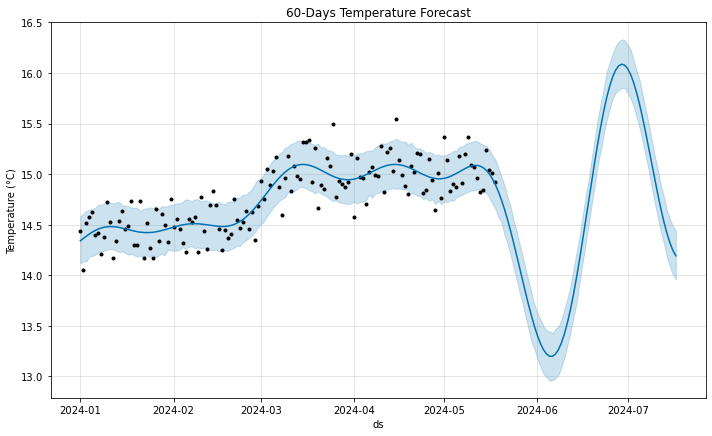

In [20]:
fig1 = model.plot(fore_m)
plt.title("60-Days Temperature Forecast")
plt.ylabel("Temperature (°C)")
plt.show()

c:\Users\solom\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\solom\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


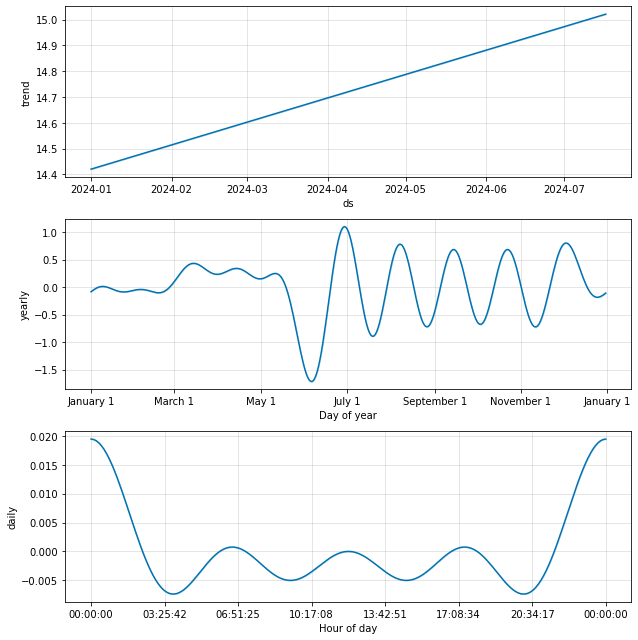

In [21]:
fig2 = model.plot_components(fore_m)
plt.show()

In [23]:
# Storing and exporting the Forecast output
fore_m[["ds", "yhat", "yhat_lower", "yhat_upper"]].to_csv("temperature_forecast.csv", index=False)

In [4]:
a = pd.read_csv('temperature_forecast.csv')

In [5]:
print(a.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ds          199 non-null    object 
 1   yhat        199 non-null    float64
 2   yhat_lower  199 non-null    float64
 3   yhat_upper  199 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.3+ KB
None


In [7]:
print(a.head())

           ds       yhat  yhat_lower  yhat_upper
0  2024-01-01  14.340388   14.115396   14.581730
1  2024-01-02  14.363502   14.139566   14.608104
2  2024-01-03  14.385936   14.133920   14.636810
3  2024-01-04  14.406970   14.187330   14.645686
4  2024-01-05  14.425998   14.189849   14.654865
